Si nuestro dato de salida tiene un valor cualitativo utilizamos y aplicamos la regresión logística.
Es decir, una etiqueta: verdadero o falso, si o no, 0 o 1.

El valor cercano a 1 es cuando el valor binario es sí.
El valor cercano a 0 es cuando el valor binario es no.
Si estamos en el punto medio (0,50) tenemos que divir y saber que tan cercano está a 1. Por ej., si está en 0,60 decimos que es sí.

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
#Cargamos columnas necesarias para hacer el aprendizaje

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
logreg = LogisticRegression()

In [7]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Para evaluar el modelo está la 'Matriz de Confusión'.



In [9]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

Text(0.5, 320.8, 'Etiqueta de Prediccion')

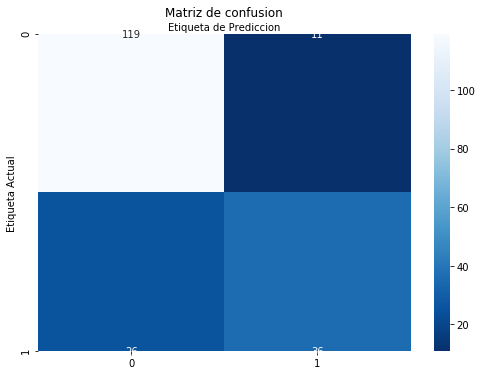

In [10]:
#Ploteamos la matriz de confusión

import numpy as np

class_names = [0,1]
fig, ax = plt.subplots(figsize=(7, 5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r',fmt= 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y= 1.1)
plt.ylabel('Etiqueta Actual')
plt.xlabel('Etiqueta de Prediccion')

119 datos fueron clasificados correctamente.

36 datos fueron clasificados correctamente.

11 datos fueron clasificados incorrectamente

18 datos fueron clasificados incorrectamente.

Otra forma para evaluar el modelo está la 'Exactitud'

In [11]:
print('Exactitud', metrics.accuracy_score(y_test, y_pred))

Exactitud 0.8072916666666666


Este modelo tiene el 80% de probabilidades dados nuevos datos que clasifique correctamente si un paciente tiene diabetes o no.